In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("data_stocks.csv")

In [3]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
data_new = data.copy()
data_new.drop(['DATE','SP500'],inplace=True,axis=1)

In [5]:
data_new.shape

(41266, 500)

In [6]:
data_new.isnull().sum().sum()

0

## Problem 1: There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

In [44]:
cor=data_new.corr()

In [45]:
cor.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213


## Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scalar=StandardScaler()
scalar.fit(data_new)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_data=scalar.transform(data_new)
scaled_data

array([[-1.65013444, -1.08607297, -1.68982378, ..., -1.95578373,
         0.10281519, -2.04188417],
       [-1.64093012, -1.08286618, -1.59006459, ..., -1.98549977,
         0.06179505, -2.04188417],
       [-1.65627065, -1.08445354, -1.60379955, ..., -1.98302344,
         0.04931066, -2.03740234],
       ...,
       [-0.91072048,  2.17363755,  1.98753131, ...,  1.2684067 ,
        -1.26868429,  0.74730823],
       [-0.9199248 ,  2.15279336,  1.97235056, ...,  1.25602502,
        -1.28295217,  0.73090473],
       [-0.91072048,  2.16882735,  2.00126627, ...,  1.25107235,
        -1.27403475,  0.74581429]])

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
x_pca=pca.transform(scaled_data)
x_pca.shape

(41266, 2)

In [13]:
elbow_w=[]
K=range(1,10)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(x_pca)
    elbow_w.append(km.inertia_)

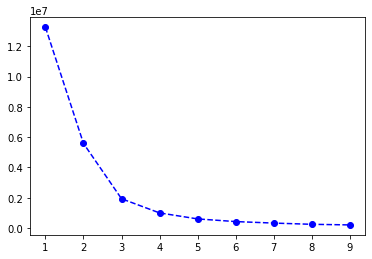

In [14]:
plt.plot(K,elbow_w,'bo--')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
#Using silhouette_score to find the K or no. of clusters.
ss=[]
n=range(2,8)

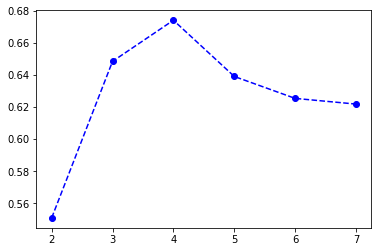

In [17]:
for n_clu in n:
    clust=KMeans(n_clusters=n_clu)
    preds=clust.fit_predict(x_pca)
    ss.append(silhouette_score(x_pca,preds,metric='euclidean'))
plt.plot(n,ss,'bo--')

In [18]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
ymeans=kmeans.predict(x_pca)

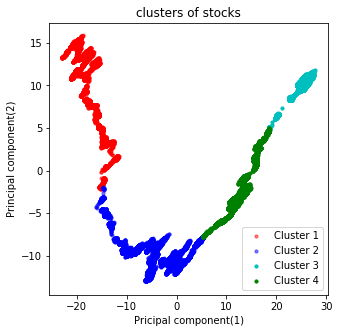

In [28]:
#ploting data in 4 clusters
fig=plt.figure(figsize=(5,5))
plt.scatter(x_pca[ymeans==0,0],x_pca[ymeans==0,1],s=10,c='r',alpha=0.5,label="Cluster 1")
plt.scatter(x_pca[ymeans==1,0],x_pca[ymeans==1,1],s=10,c='b',alpha=0.5,label="Cluster 2")
plt.scatter(x_pca[ymeans==2,0],x_pca[ymeans==2,1],s=10,c='c',label="Cluster 3")
plt.scatter(x_pca[ymeans==3,0],x_pca[ymeans==3,1],s=10,c='g',alpha=1.0,label="Cluster 4")
plt.title('clusters of stocks')
plt.xlabel('Pricipal component(1)')
plt.ylabel('Principal component(2)')
plt.legend()
plt.show()

## Problem 3: Identify which all stocks are moving together and which all stocks are different from each other.

In [49]:
# Apply PCA to identify the stocks correlated with each other
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [50]:
dt = data.copy()
dt.drop(['DATE','SP500'],inplace=True,axis=1)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# convert data into numpy arrays
X = dt.values

# Scaling the values
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=150)
pca.fit(X_scaled)

# the amount of variance that each PCA explains
var = pca.explained_variance_ratio_

# cumulative varince explains
var1 = np.cumsum(np.round(var, decimals=4)*100)
print(var1)

[47.03 64.26 76.28 81.13 84.93 87.74 89.74 91.05 92.1  92.85 93.53 94.11
 94.57 95.02 95.43 95.78 96.11 96.37 96.6  96.82 97.01 97.17 97.32 97.45
 97.58 97.7  97.81 97.91 98.   98.08 98.16 98.24 98.31 98.38 98.44 98.5
 98.56 98.61 98.66 98.71 98.75 98.79 98.83 98.87 98.91 98.94 98.97 99.
 99.03 99.06 99.09 99.12 99.15 99.17 99.19 99.21 99.23 99.25 99.27 99.29
 99.31 99.33 99.35 99.37 99.39 99.41 99.43 99.45 99.46 99.47 99.48 99.49
 99.5  99.51 99.52 99.53 99.54 99.55 99.56 99.57 99.58 99.59 99.6  99.61
 99.62 99.63 99.64 99.65 99.66 99.67 99.68 99.69 99.7  99.71 99.72 99.73
 99.74 99.75 99.76 99.77 99.78 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79]


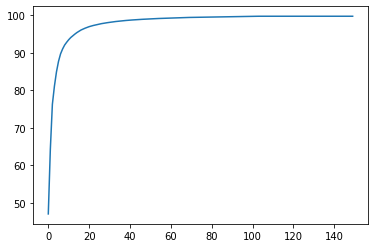

In [51]:
plt.plot(var1)

In [52]:
# Looking at above plot I can consider 25 variables 
pca = PCA(n_components =25)
X1 = pca.fit_transform(X_scaled)
print(X1)

[[ 25.55018064  10.00580482  -9.38207446 ...   0.54898792   0.09679853
    2.41634475]
 [ 25.64880185   9.89282687  -9.8023104  ...   0.45075987   0.18036943
    2.30954871]
 [ 25.56345929   9.82533675  -9.67570287 ...   0.52729617   0.05295399
    2.05260167]
 ...
 [-22.76894921  13.32753802   6.56220278 ...  -2.15217759   1.18588108
   -0.3136739 ]
 [-22.61319638  13.41831515   6.6755356  ...  -2.13791377   1.19226068
   -0.34009694]
 [-22.72127837  13.36292841   6.60406294 ...  -2.17510366   1.17183618
   -0.29988831]]


In [53]:
print('Number of PCA :',len(pca.components_))
print(abs(pca.components_))

Number of PCA : 25
[[0.03925756 0.04106421 0.0629084  ... 0.06247664 0.00253829 0.05169773]
 [0.06428354 0.033861   0.00186129 ... 0.02040637 0.08122924 0.05950068]
 [0.03985758 0.06416494 0.01207933 ... 0.02101011 0.06637293 0.02356977]
 ...
 [0.01161272 0.00534388 0.00472457 ... 0.01178677 0.04444232 0.01198148]
 [0.07435042 0.02135926 0.00915356 ... 0.00128654 0.01807838 0.04830177]
 [0.02130339 0.03340517 0.03702094 ... 0.00439105 0.02058901 0.02516072]]


In [54]:
comp = pd.DataFrame(pca.components_, columns = dt.columns)
comp.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.039258,-0.041064,-0.062908,-0.009788,-0.035866,-0.054668,0.050356,-0.035396,-0.044060,-0.014671,...,-0.049413,0.057001,-0.054623,-0.050608,0.047199,-0.057897,-0.061392,-0.062477,0.002538,-0.051698
1,-0.064284,0.033861,0.001861,-0.032453,0.043511,-0.029519,0.016178,0.058286,-0.052667,0.012376,...,-0.058941,0.030277,0.013643,-0.040769,-0.052795,0.010238,0.031466,-0.020406,-0.081229,-0.059501
2,-0.039858,0.064165,0.012079,0.043266,-0.037239,0.040506,-0.053892,-0.051099,0.030738,-0.086428,...,-0.003223,0.022125,0.059617,-0.034587,-0.028712,-0.039074,-0.004342,0.021010,-0.066373,0.023570
3,0.007578,0.077164,0.008564,-0.027896,-0.017418,0.008973,-0.032239,0.034448,0.051511,-0.077594,...,0.021692,0.060885,-0.039630,0.027694,0.012100,-0.039575,0.002900,-0.002703,-0.049420,0.015160
4,-0.033303,-0.016981,0.002438,-0.038330,-0.102023,-0.034831,-0.011187,0.037595,-0.039683,-0.014357,...,-0.036672,-0.011451,-0.030314,-0.012030,-0.045731,0.029255,-0.003013,-0.001339,-0.003603,0.005364
